# Ejercicios con Dataset Superstore

In [2]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Usar el método read_csv de Pandas (pd) que recibe como argumento el archivo csv y retorna un dataframe
import os
os.chdir('/content/drive/MyDrive/DATASETS')
df = pd.read_csv("superstore.csv", encoding="latin1")

In [ ]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [5]:
# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [6]:
# Tomemos algunas muestras
df.sample()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
1377,1378,CA-2014-126361,8/4/2014,8/9/2014,Second Class,VD-21670,Valerie Dominguez,Consumer,United States,Pleasant Grove,...,84062,West,OFF-AR-10000896,Office Supplies,Art,Newell 329,16.4,5,0.0,4.264


In [7]:
df["city"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [8]:
# Limpieza básica y conversión de tipo de datos
df = df.dropna(subset=["order_date", "sales", "profit"])
# Convertimos el campo fecha de string a datetime
df["order_date"] = pd.to_datetime(df["order_date"])

In [9]:
# Transformación: generar las columnas año y mes a partir del campo date
df["year"]=df["order_date"].dt.year

In [10]:
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


## Analizamos las ventas totales por ciudades

In [26]:
# Hagamos un grafico de barras de las mejores 10 ventas acumuladas por ciudad
df_aggr=df.groupby("city").agg(
    {"sales":"sum",   # ene ste caso suma pero se puede usar otras fucniones "mean":promedio ;"min";"max","std";"count";"median"
    "profit":"sum"}   #ademas se puede escribir np.min
    ).sort_values(by="profit", ascending=False).head(10)
df_aggr=df_aggr.reset_index().rename(columns={"sales":"Ventas", "city":"Ciudades", "profit":"Ganancias"})
df_aggr

,Ciudades,Ventas,Ganancias
0,New York City,256368.161,62036.9837
1,Los Angeles,175851.341,30440.7579
2,Seattle,119540.742,29156.0967
3,San Francisco,112669.092,17507.3854
4,Detroit,42446.944,13181.7908
5,Lafayette,25036.200,10018.3876
6,Jackson,24963.858,7581.6828
7,Atlanta,17197.840,6993.6629
8,Minneapolis,16870.540,6824.5846
9,San Diego,47521.029,6377.1960


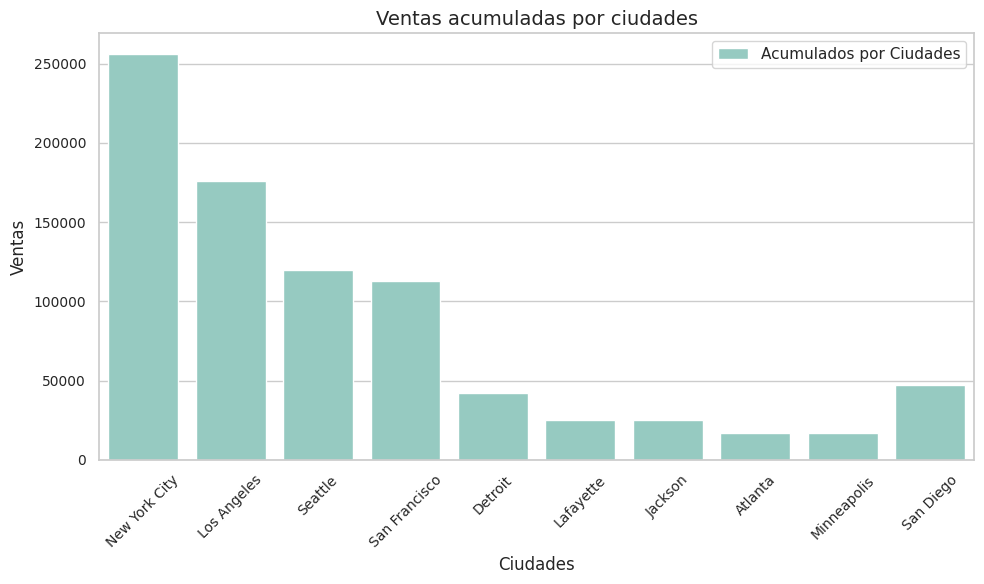

In [27]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos el lienzo
plt.figure(figsize=(10,6))

sns.barplot(data=df_aggr, x="Ciudades", y="Ventas", width=0.8, label="Acumulados por Ciudades")

# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', rotation=45, labelsize=10)

# Ajustes de título y ejes
plt.title('Ventas acumuladas por ciudades', fontsize=14)
plt.xlabel('Ciudades')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()


<BarContainer object of 10 artists>

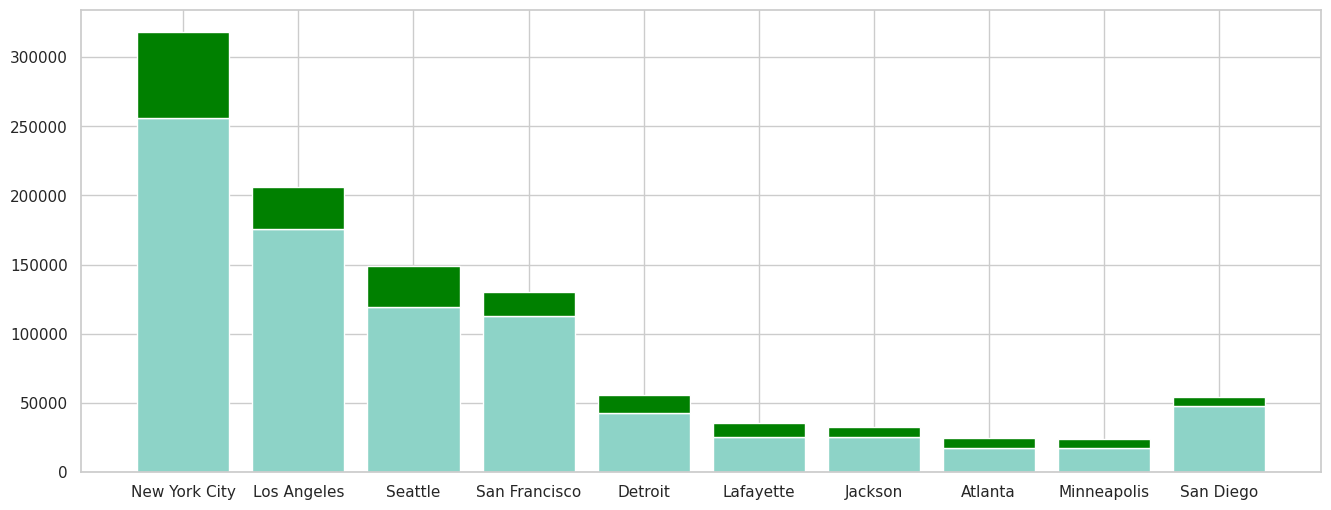

In [28]:
# Y representemos en un grafico de barras apilado la relacion ventas/ganancias
plt.figure(figsize=(16,6))

# Primer nivel (abajo)
plt.bar(df_aggr["Ciudades"], df_aggr["Ventas"], label="Ventas")

df_aggr['color'] = df_aggr['Ganancias'].apply(lambda x: 'green' if x >= 0 else 'red')

# Segundo nivel (arriba)
plt.bar(df_aggr["Ciudades"], df_aggr["Ganancias"], color=df_aggr['color'],
        bottom=df_aggr["Ventas"],
        label="Ganancias")

In [29]:
# Formato largo
df_long = df_aggr.melt(
    id_vars="Ciudades",
    value_vars=["Ventas", "Ganancias"],
    var_name="Tipo",
    value_name="Valor"
)
df_long.head()

,Ciudades,Tipo,Valor
0,New York City,Ventas,256368.161
1,Los Angeles,Ventas,175851.341
2,Seattle,Ventas,119540.742
3,San Francisco,Ventas,112669.092
4,Detroit,Ventas,42446.944


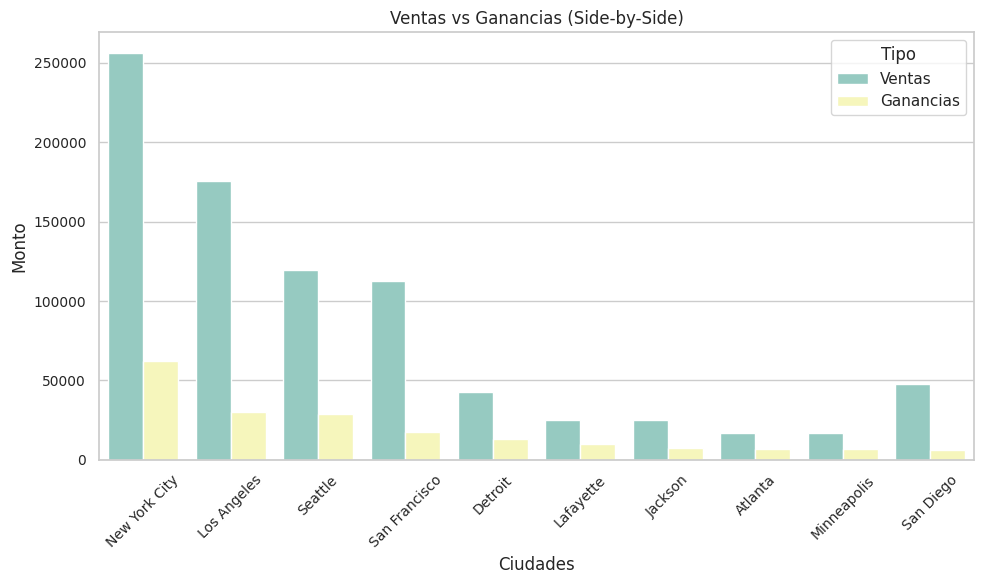

In [30]:
# Definimos el lienzo
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_long,
    x="Ciudades",
    y="Valor",
    hue="Tipo",
    dodge=True,           # ← SIDE BY SIDE
)

# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', rotation=45, labelsize=10)

# Ajustes de títulos y ejes
plt.title("Ventas vs Ganancias (Side-by-Side)")
plt.xlabel("Ciudades")
plt.ylabel("Monto")
plt.tight_layout()
plt.show()


## Analizamos las ventas totales por ciudades, comparando por años

In [31]:
# Buscamos las 3 ciudades con mayor volumen de ventas
df_aggr=df.groupby(["city"], as_index=False).agg(
    {"sales":"sum"}
    ).sort_values(by=["sales"], ascending=False).head(3)
df_aggr

,city,sales
329,New York City,256368.161
266,Los Angeles,175851.341
452,Seattle,119540.742


In [32]:
# Filtramos del df original estas tres ciudades
df_filtrado=df[df["city"].isin(df_aggr["city"])]


In [39]:
# Hagamos un grafico de barras de las mejores 10 ventas acumuladas por ciudad
df_aggr1=df_filtrado.groupby(["city", "year"]).agg(
    {"sales":"sum"}
    )
df_aggr1=df_aggr1.reset_index().rename(columns={"sales":"Ventas", "city":"Ciudades", "year": "Año"})
df_aggr1

,Ciudades,Año,Ventas
0,Los Angeles,2014,28882.6965
1,Los Angeles,2015,41694.2040
2,Los Angeles,2016,56398.7480
3,Los Angeles,2017,48875.6925
4,New York City,2014,44361.0890
5,New York City,2015,70243.3730
6,New York City,2016,54824.0980
7,New York City,2017,86939.6010
8,Seattle,2014,23531.9940
9,Seattle,2015,22859.2060


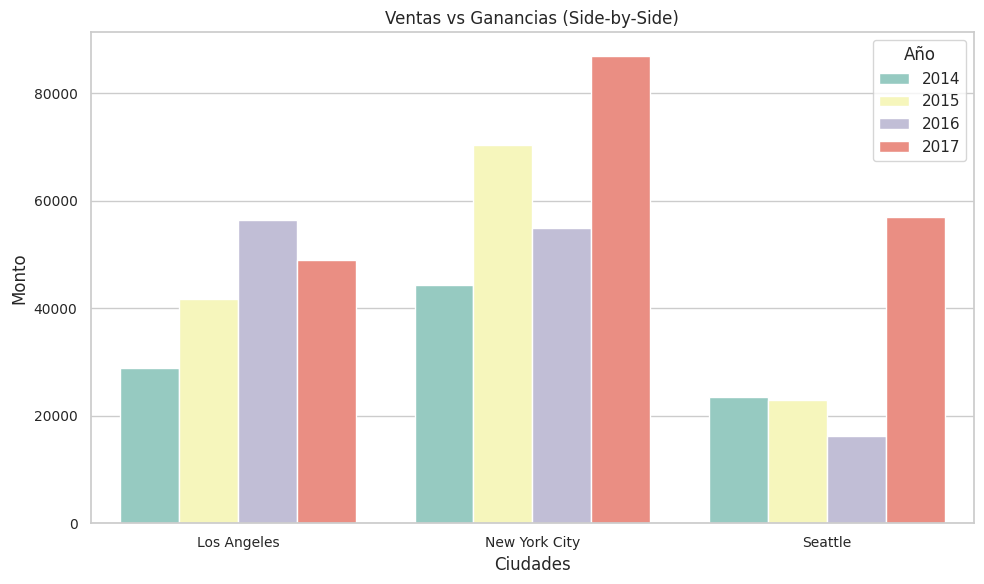

In [40]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos el lienzo
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_aggr1,
    x="Ciudades",
    y="Ventas",
    hue="Año",
    dodge=True,           # ← SIDE BY SIDE
    palette="Set3" # poner para que aplique la paleta
)

# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

# Ajustes de títulos y ejes
plt.title("Ventas vs Ganancias (Side-by-Side)")
plt.xlabel("Ciudades")
plt.ylabel("Monto")
plt.tight_layout()
plt.show()

# Bonus track

El Rose Chart o Coxcomb Chart es un tipo de gráfico polar creado por Florence Nightingale en 1858 para mostrar de manera impactante las causas de muerte de los soldados británicos durante la Guerra de Crimea.

⭐ Características principales

* Es un gráfico circular dividido en segmentos iguales (como pétalos).
* Cada segmento representa un mes.
* La altura del pétalo (radio) representa la magnitud del valor.

Nightingale lo usó para mostrar tres categorías de muertes:

* Enfermedades prevenibles
* Heridas en combate
* Otras causas

Los colores diferenciaban cada causa.

Su forma visual enfatiza cómo las enfermedades mataban mucho más que las batallas.

🎯 Objetivo del gráfico

Demostrar de forma clara y contundente que la mayoría de las muertes se debían a mala higiene y enfermedades, no al combate.
Este gráfico fue clave para convencer al gobierno británico de implementar reformas sanitarias en los hospitales militares.

🔥 Por qué es famoso

* Es uno de los primeros ejemplos de storytelling con datos.
* Pionero en data visualization.
* Impactó políticas públicas.

🧠 Concepto técnico

* No es un pie chart.
* No representa proporciones.
* Representa valores absolutos en un espacio polar.
* Se llama coxcomb chart o polar area chart.

[Florence Nightingale's Famous Rose Chart](https://www.youtube.com/watch?v=JZh8tUy_bnM)

[Bibliografía - Wikipedia](https://es.wikipedia.org/wiki/Florence_Nightingale)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def nightingale_rose(df, col_categoria="Ciudades", col_valor="Ventas",
                     title="Nightingale Rose Diagram"):
    """
    df: DataFrame ordenado con dos columnas
    col_categoria: nombre de la columna de categorías
    col_valor: nombre de la columna numérica
    """

    categorias = df[col_categoria].tolist()
    valores = df[col_valor].tolist()

    N = len(df)                           # número de filas del df
    angles = np.linspace(0, 2*np.pi, N, endpoint=False)

    # Paleta automática (tab20 soporta hasta 20 colores, tab20b + tab20c permiten más)
    if N <= 15:
        colors = plt.cm.tab20(np.linspace(0, 1, N))
    else:
        # Para más de 20 categorías, usamos una paleta continua
        colors = plt.cm.viridis(np.linspace(0, 1, N))

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    # Barras
    ax.bar(
        angles,
        valores,
        width=2 * np.pi / N,
        bottom=0,
        color=colors,
        edgecolor="white",
        linewidth=1
    )

    # Etiquetas
    for angle, value, label in zip(angles, valores, categorias):
        ax.text(
            angle,
            value + (max(valores) * 0.05),
            f"{label}\n{value}",
            ha="center",
            va="center",
            fontsize=8
        )

    # Limpieza estética
    ax.set_yticklabels([])
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.title(title, fontsize=16, pad=20)
    plt.show()



In [43]:
# Hagamos un grafico de barras de las mejores 10 ventas acumuladas por ciudad
df_aggr=df.groupby("city").agg(
    {"sales":"sum"}
    ).sort_values(by="sales", ascending=False).head(10)
df_aggr=df_aggr.reset_index().rename(columns={"sales":"Ventas", "city":"Ciudades"})
df_aggr

,Ciudades,Ventas
0,New York City,256368.1610
1,Los Angeles,175851.3410
2,Seattle,119540.7420
3,San Francisco,112669.0920
4,Philadelphia,109077.0130
5,Houston,64504.7604
6,Chicago,48539.5410
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


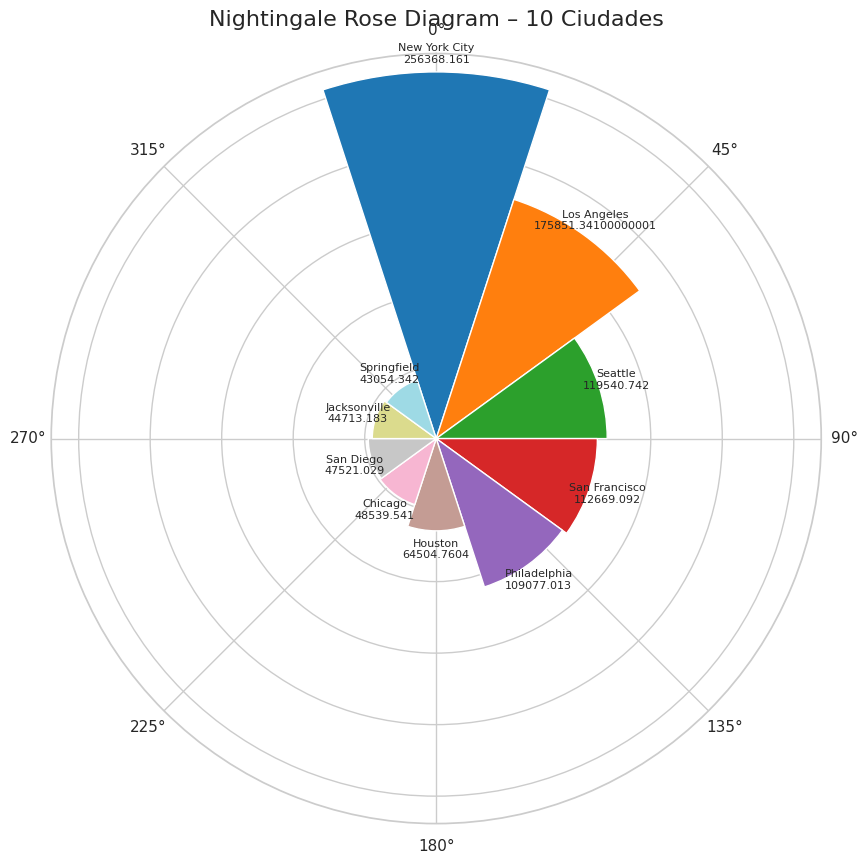

In [44]:
# Graficamos con Nightingale Rose
nightingale_rose(df_aggr, "Ciudades", "Ventas",
                 title="Nightingale Rose Diagram – 10 Ciudades")
